In [1]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [2]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017,1, 11)

In [3]:
# Extract AAPL's prices
df = web.DataReader("TSLA", "yahoo", start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-06,230.309998,225.449997,226.929993,229.009995,5527900,229.009995
2017-01-09,231.919998,228.000000,228.970001,231.279999,3957000,231.279999
2017-01-10,232.000000,226.889999,232.000000,229.869995,3660000,229.869995
2017-01-11,229.979996,226.679993,229.070007,229.729996,3650800,229.729996
2017-01-12,230.699997,225.580002,229.059998,229.589996,3790200,229.589996


In [4]:
# Print rolling mean (moving average)
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
2010-07-07           NaN
2010-07-08           NaN
2010-07-09           NaN
2010-07-12           NaN
2010-07-13           NaN
2010-07-14           NaN
2010-07-15           NaN
2010-07-16           NaN
2010-07-19           NaN
2010-07-20           NaN
2010-07-21           NaN
2010-07-22           NaN
2010-07-23           NaN
2010-07-26           NaN
2010-07-27           NaN
2010-07-28           NaN
2010-07-29           NaN
2010-07-30           NaN
2010-08-02           NaN
2010-08-03           NaN
2010-08-04           NaN
2010-08-05           NaN
2010-08-06           NaN
2010-08-09           NaN
2010-08-10           NaN
                 ...    
2016-11-30    207.660900
2016-12-01    207.233200
2016-12-02    206.822600
2016-12-05    206.475300
2016-12-06    206.129800
2016-12-07    205.798800
2016-12-08    205.469100
2016-12-09    205.107300
2016-12-12    204.82

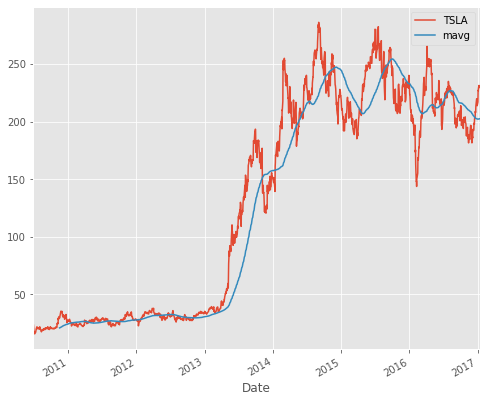

In [5]:
# Plot out with matplotlib. Overlay the moving average with AAPL's price chart
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='TSLA')
mavg.plot(label='mavg')
plt.legend()

In [6]:
# Engineer some features (before we use three machine learning models for prediction):
# High Low Percentage and Percentage Change
# Notice volume is being used
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [7]:
dfreg

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2010-06-29,23.889999,18766300,31.226452,25.736839
2010-06-30,23.830000,17187100,29.878308,-7.599848
2010-07-01,21.959999,8218800,25.728597,-12.160004
2010-07-02,19.200001,5139800,22.864589,-16.521736
2010-07-06,16.110001,6866900,25.884543,-19.449997
2010-07-07,15.800000,6921700,10.443035,-3.658533
2010-07-08,17.459999,7711400,11.168390,8.178437
2010-07-09,17.400000,4050600,7.758623,-1.023893
2010-07-12,17.049999,2202500,6.275658,-5.013936


In [8]:
# Pre-processing and cross-validation
import math
import numpy as np
from sklearn import preprocessing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the adjusted closing price
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally we want to find the data series of late X and early X (train) for 
# model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

# Predictions

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Fit Linear Regression model to training data
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Fit Quadratic Regression 2 model to training data
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Fit Quadratic Regression 3 model to training data
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [12]:
# Fit KNN Regression model to training data
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [13]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test, y_test)
confidencepoly3 = clfpoly3.score(X_test, y_test)
confidenceknn = clfknn.score(X_test, y_test)

print('The linear regression confidence (mean accuracy) is '+ str(confidencereg))
print('The quadratic regression 2 confidence (mean accuracy) is '+ str(confidencepoly2))
print('The quadratic regression 3 confidence (mean accuracy) is '+ str(confidencepoly3))
print('The knn regression confidence (mean accuracy) is '+ str(confidenceknn))

The linear regression confidence (mean accuracy) is 0.9653667285036505
The quadratic regression 2 confidence (mean accuracy) is 0.9697506282871724
The quadratic regression 3 confidence (mean accuracy) is 0.9683921783873861
The knn regression confidence (mean accuracy) is 0.9348028000944583


In [14]:
# Apply the predict method to return the predicted targets
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
forecast_set

array([201.3275573 , 207.50623268, 207.71352517, 206.70515813,
       212.04712587, 218.78386792, 217.63372591, 213.44842526,
       212.83544143, 216.18297192, 229.28138042, 226.43581571,
       228.27737666, 229.16045689, 227.55174308, 227.60415632,
       227.25392943])

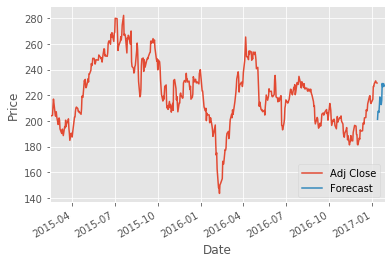

In [15]:
# Plot the prediction along with existing historical data
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()